#### Based on age, let's predict insurance purchasing behavior using logistic regression.

In [1]:
import pandas as pd
import seaborn as sns

/home/flores-cuba/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Lecture

file = 'insurance_data.csv'
df = pd.read_csv(file)

In [3]:
len(df)

27

In [4]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [5]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


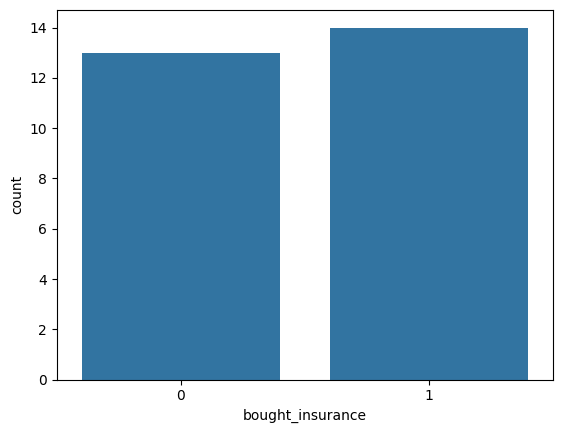

In [17]:
sns.countplot(data = df, x='bought_insurance');

<Axes: xlabel='age', ylabel='bought_insurance'>

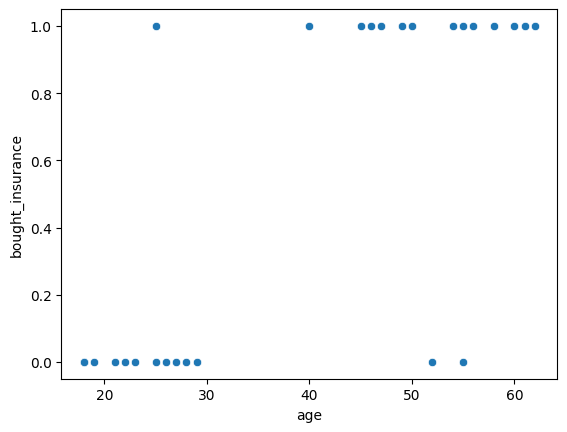

In [6]:
sns.scatterplot(x='age', y='bought_insurance', data=df)

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('bought_insurance', axis=1)
y = df['bought_insurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=40)

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# ROC AUC Score
y_prob = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", auc)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6

ROC AUC: 0.875


In [19]:
# Calculate the Gini Index
gini = 2*auc-1
print(f"Gini Index: {gini: .2f}")


# The Gini Index ranges from 0 to 1, where:

# 0 indicates a model with no discriminatory power (completely random).
# 1 indicates perfect classification (model predicts all outcomes correctly).

Gini Index:  0.75


In [18]:
print(confusion_matrix(y_test,y_pred))

[[2 0]
 [1 3]]


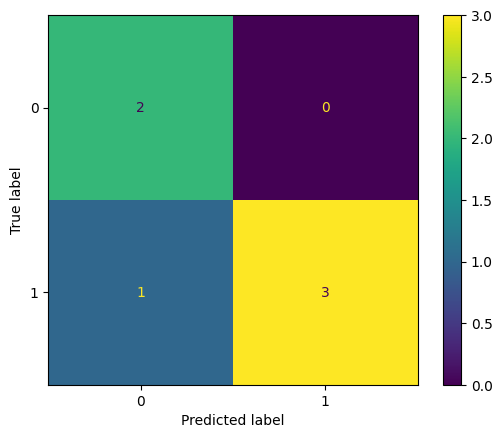

In [29]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

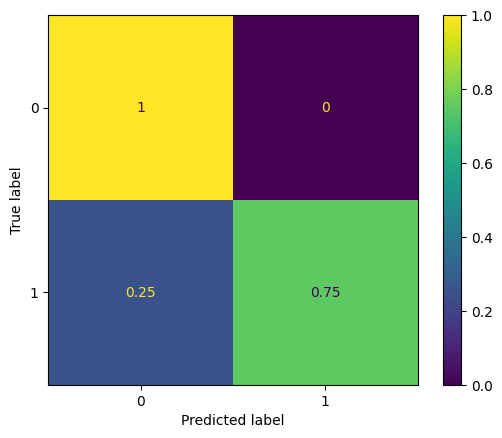

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize= 'true');